# Research from HandsOnML (Random Forest)

1. Architecture: 
* Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.
* The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.
2. How does it work? : 
Random Forest works in two-phase first is to create the random forest by combining N decision tree, and second is to make predictions for each tree created in the first phase.
* Step-1: Select random K data points from the training set.
* Step-2: Build the decision trees associated with the selected data points (Subsets).
* Step-3: Choose the number N for decision trees that you want to build.
* Step-4: Repeat Step 1 & 2.
* Step-5: For new data points, find the predictions of each decision tree, and assign the new data points to the category that wins the majority votes.
3. Why use Random Forest?
* It takes less training time as compared to other algorithms.
* It predicts output with high accuracy, even for the large dataset it runs efficiently.
* It can also maintain accuracy when a large proportion of data is missing.

# Main task

Data Pre-Processing step

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Read data
df_white_wine=pd.read_csv('D:/GITHUB/Data set/winequality-white.csv',sep=';')
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Preparing data for training

In [4]:
#Divide data into attributes and lables
white_wine_attribute = df_white_wine.iloc[:, 0:10]
white_wine_label = df_white_wine.iloc[:, 11]

In [5]:
#Divide data into training and testing sets
from sklearn.model_selection import train_test_split
white_wine_attb_train, white_wine_attb_test, white_wine_lb_train, white_wine_lb_test = train_test_split(white_wine_attribute, white_wine_label, test_size=0.2, random_state=0)

Training without Scaler

In [6]:
from sklearn.ensemble import RandomForestClassifier 

In [7]:
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, accuracy_score, ConfusionMatrixDisplay

In [8]:
import warnings
warnings.filterwarnings('ignore')

[[  0   1   5   3   0   0]
 [  0   4  27  19   1   0]
 [  0   0 196  94   5   0]
 [  0   3  69 303  33   1]
 [  0   0   9  77  93   4]
 [  0   0   1  17   8   7]]


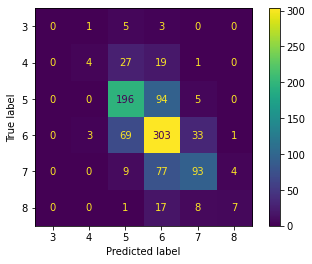

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.50      0.08      0.14        51
           5       0.64      0.66      0.65       295
           6       0.59      0.74      0.66       409
           7       0.66      0.51      0.58       183
           8       0.58      0.21      0.31        33

    accuracy                           0.62       980
   macro avg       0.50      0.37      0.39       980
weighted avg       0.61      0.62      0.60       980

Balanced accuracy:  0.3673312302477074
Accuracy:  0.6153061224489796


In [9]:
classifier_rf.fit(white_wine_attb_train, white_wine_lb_train) 
white_wine_lb_pred= classifier_rf.predict(white_wine_attb_test)  
#Evaluating when without Scaler
print(confusion_matrix(white_wine_lb_test,white_wine_lb_pred))
ConfusionMatrixDisplay.from_predictions(white_wine_lb_test,white_wine_lb_pred)
plt.show()
print(classification_report(white_wine_lb_test,white_wine_lb_pred))
print('Balanced accuracy: ', balanced_accuracy_score(white_wine_lb_test, white_wine_lb_pred))
print('Accuracy: ', accuracy_score(white_wine_lb_test, white_wine_lb_pred))

Classifying the wine quality

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10,max_depth=3)
rf.fit(white_wine_attribute, white_wine_label)

RandomForestRegressor(max_depth=3, n_estimators=10)

In [11]:
len(rf.estimators_)

10

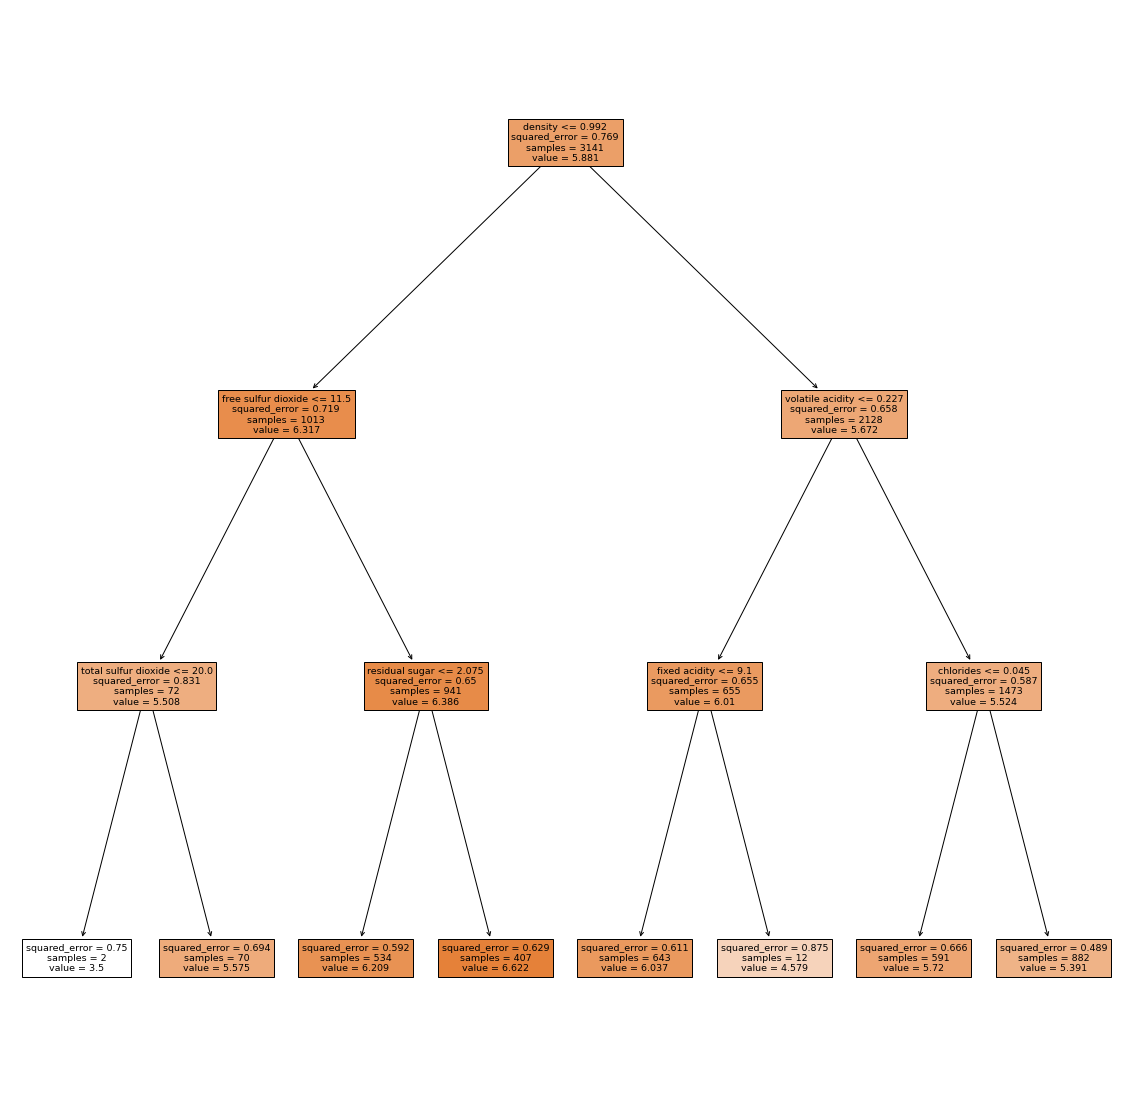

In [12]:
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=white_wine_attribute.columns, filled=True)

Feature Scaling

In [13]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [14]:
def scaling (df_train, df_test, sc):
    trans = sc().fit(df_train)
    df_train = trans.fit_transform(df_train)
    trans = sc().fit(df_test)
    df_test = trans.fit_transform(df_test)
    return df_train, df_test

Scaler_name = [MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer]
white_wine_attb_train_sca = [0,0,0,0,0]
white_wine_attb_test_sca = [1,1,1,1,1]
for i in range (0, 5):
    white_wine_attb_train_sca[i], white_wine_attb_test_sca[i] = scaling (white_wine_attb_train, white_wine_attb_test, Scaler_name[i])

Evaluating

<class 'sklearn.preprocessing._data.MinMaxScaler'>
[[  0   1   3   3   2   0]
 [  0   3  15  28   5   0]
 [  0   0  75 204  15   1]
 [  0   2  45 273  81   8]
 [  0   0  17  95  71   0]
 [  0   0   1  22   7   3]]


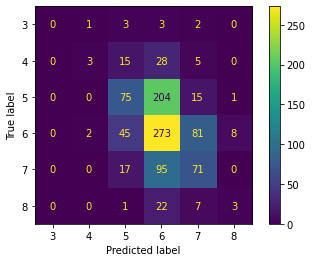

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.50      0.06      0.11        51
           5       0.48      0.25      0.33       295
           6       0.44      0.67      0.53       409
           7       0.39      0.39      0.39       183
           8       0.25      0.09      0.13        33

    accuracy                           0.43       980
   macro avg       0.34      0.24      0.25       980
weighted avg       0.43      0.43      0.40       980

Balanced accuracy:  0.2432382855207731
Accuracy:  0.4336734693877551
<class 'sklearn.preprocessing._data.StandardScaler'>
[[  0   1   4   4   0   0]
 [  0   5  29  16   1   0]
 [  0   0 184 104   7   0]
 [  0   1  70 304  34   0]
 [  0   0   6  84  91   2]
 [  0   0   1  19  10   3]]


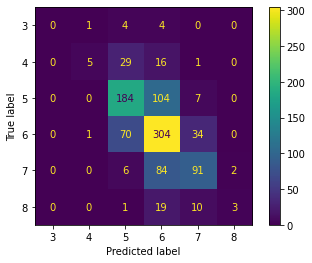

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.71      0.10      0.17        51
           5       0.63      0.62      0.62       295
           6       0.57      0.74      0.65       409
           7       0.64      0.50      0.56       183
           8       0.60      0.09      0.16        33

    accuracy                           0.60       980
   macro avg       0.52      0.34      0.36       980
weighted avg       0.60      0.60      0.58       980

Balanced accuracy:  0.3422035272226851
Accuracy:  0.5989795918367347
<class 'sklearn.preprocessing._data.MaxAbsScaler'>
[[  0   0   4   2   2   1]
 [  0   1   8  30   9   3]
 [  0   3  59 147  68  18]
 [  0   0  56 234  95  24]
 [  0   0  19 110  47   7]
 [  0   0   3  24   3   3]]


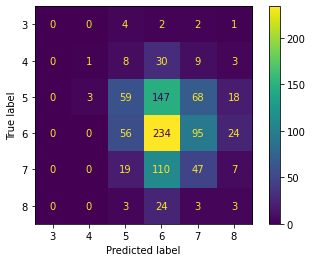

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.25      0.02      0.04        51
           5       0.40      0.20      0.27       295
           6       0.43      0.57      0.49       409
           7       0.21      0.26      0.23       183
           8       0.05      0.09      0.07        33

    accuracy                           0.35       980
   macro avg       0.22      0.19      0.18       980
weighted avg       0.35      0.35      0.33       980

Balanced accuracy:  0.18991244575059085
Accuracy:  0.3510204081632653
<class 'sklearn.preprocessing._data.RobustScaler'>
[[  1   0   2   6   0   0]
 [  0  10  22  16   3   0]
 [  0   2 202  86   5   0]
 [  0   0  62 310  37   0]
 [  0   0   7  74 100   2]
 [  0   0   5  14   7   7]]


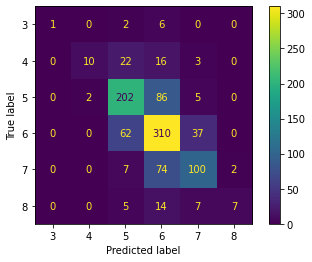

              precision    recall  f1-score   support

           3       1.00      0.11      0.20         9
           4       0.83      0.20      0.32        51
           5       0.67      0.68      0.68       295
           6       0.61      0.76      0.68       409
           7       0.66      0.55      0.60       183
           8       0.78      0.21      0.33        33

    accuracy                           0.64       980
   macro avg       0.76      0.42      0.47       980
weighted avg       0.66      0.64      0.63       980

Balanced accuracy:  0.41807513583622985
Accuracy:  0.6428571428571429
<class 'sklearn.preprocessing._data.Normalizer'>
[[  0   1   4   4   0   0]
 [  0   7  26  18   0   0]
 [  0   4 183  97  10   1]
 [  0   1  89 289  30   0]
 [  0   0  12  81  90   0]
 [  0   1   1  18   5   8]]


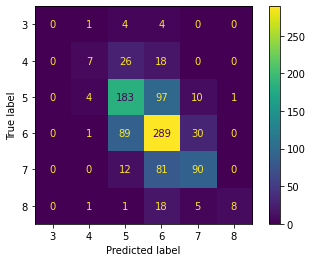

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.50      0.14      0.22        51
           5       0.58      0.62      0.60       295
           6       0.57      0.71      0.63       409
           7       0.67      0.49      0.57       183
           8       0.89      0.24      0.38        33

    accuracy                           0.59       980
   macro avg       0.53      0.37      0.40       980
weighted avg       0.59      0.59      0.57       980

Balanced accuracy:  0.3664038121861773
Accuracy:  0.5887755102040816


In [15]:
for i in range (0,5): 
    classifier_rf.fit(white_wine_attb_train_sca[i], white_wine_lb_train) 
    white_wine_lb_pred= classifier_rf.predict(white_wine_attb_test_sca[i])  
    #Evaluating when with Scaler
    print(Scaler_name[i])
    print(confusion_matrix(white_wine_lb_test,white_wine_lb_pred))
    ConfusionMatrixDisplay.from_predictions(white_wine_lb_test,white_wine_lb_pred)
    plt.show()
    print(classification_report(white_wine_lb_test,white_wine_lb_pred))
    print('Balanced accuracy: ', balanced_accuracy_score(white_wine_lb_test, white_wine_lb_pred))
    print('Accuracy: ', accuracy_score(white_wine_lb_test, white_wine_lb_pred))

Visualize the ROC curve and Calculate AUC score

AUC for Class 1: nan
AUC for Class 2: nan
AUC for Class 3: 0.7059732234809475
AUC for Class 4: 0.3395597205512991
AUC for Class 5: 0.23717679079549672
AUC for Class 6: 0.5439369869700563
AUC for Class 7: 0.5406647880371063


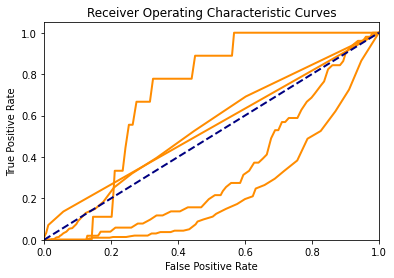

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
#construct baseline pipeline
pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state=123))])
# Fit the model
model = pipe_rf.fit(white_wine_attb_train, white_wine_lb_train)
#Calculate the white_wine_label_score
white_wine_lb_score = model.predict_proba(white_wine_attb_test)
#Binarize the output
white_wine_lb_test_bin = label_binarize(white_wine_lb_test, classes=[1, 2, 3, 4, 5, 6,7])
n_classes = white_wine_lb_test_bin.shape[1]
#Visualize
fpr = dict()
tpr = dict()
roc_auc = dict()
# np.concatenate((1-y_probas,y_probas),axis=1)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(white_wine_lb_test_bin[:, i], white_wine_lb_score[:, i])
    plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
    print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()